Things to do: 

1. Push to github


1. Understand the effect of the mapping 


1. Do the another model?

1. (Maybe taxi rides, Maybe the other things)




Doing more ???

1. Push further:

In [2]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
import jax.numpy as jnp
from jax import grad, vmap
import jax
from jax.tree_util import tree_map
import jax.random as jrandom
import jax.scipy as scipy
import jax.scipy.stats as stats
import matplotlib.pyplot as plt
from typing import NamedTuple, Mapping
from functools import partial
from tensorflow_probability.substrates import jax as tfp
bijectors = tfp.bijectors
sigmoid_transform = bijectors.IteratedSigmoidCentered()
from models import *
from advi import *

In [6]:
N = 100
d = 3
key = jrandom.key(42)
k1, k2, k3 = jrandom.split(key, 3)
X_data = jrandom.normal(k1, shape=(N, d))
w_star = jrandom.normal(k2, shape=(d,)) * 2
y = X_data @ w_star
linear_model = LinearModel(X_data, y, 1, 1)
linear_advi = mean_field_advi(linear_model)
key = jrandom.key(52)
loss = linear_advi.run_advi(key, 100, 1001, 1e-4, print_every=500, adaptive=True, alpha=0.5)
print("Sample ", linear_advi.sample(k3)[0])
print("True value", w_star)

-2103.9502
-157.28076
-27.707773
Sample  [-2.0109599 -1.756732  -1.3096539]
True value [-2.0137007 -1.7523379 -1.3056182]


In [7]:
from scipy.io import loadmat
all_data = loadmat("data/frey_rawface.mat")
data = all_data["ff"].T 

In [8]:
rank = 10
nmf_model = NMF_Model_PoissonGamma(
    data, rank, gamma_prior_shape=1, gamma_prior_scale=1
)
nmf_dim = nmf_model.dim
k = jrandom.key(15)
trial_vec = jrandom.normal(k, shape=(nmf_dim,))
theta, beta = nmf_model.t_inv_map(trial_vec)
nmf_advi = mean_field_advi(nmf_model)
nmf_advi.run_advi(k, 3, 5001, 1e-6, print_every=500, adaptive=True)


thetas,betas  = nmf_model.t_inv_map(nmf_advi.params["mu"])

u = 42
fig, axs = plt.subplots(2, 5, figsize=(12, 5))
axs = axs.flatten()
for i in range(10):
    axs[i].imshow(betas[i].reshape(28, 20), cmap="gray")
    axs[i].axis("off")
    axs[i].set_title(rf"$\beta_{{{i}}}$")

-1675961300.0
-1253895300.0
-1189567600.0
-1153612800.0
-1128470400.0
-1108975400.0
-1093352400.0
-1080028200.0
-1068537660.0
-1058423940.0
-1049379800.0
-1041229100.0
-1033791300.0
-1026953000.0
-1020604000.0
-1014697800.0
-1009196540.0
-1004074000.0
-999127500.0
-994540540.0
-990129660.0
-985994200.0
-982034900.0
-978233540.0
-974660200.0
-971176260.0
-967840600.0
-964618200.0
-961517200.0
-958561800.0
-955647800.0
-952850600.0
-950150800.0
-947551040.0
-945026700.0
-942559700.0
-940172400.0
-937822700.0
-935566800.0
-933310660.0
-931271100.0
-929144000.0
-927083840.0
-925056000.0
-923115500.0
-921246140.0
-919360960.0
-917504830.0
-915706050.0
-913985700.0
-912254460.0


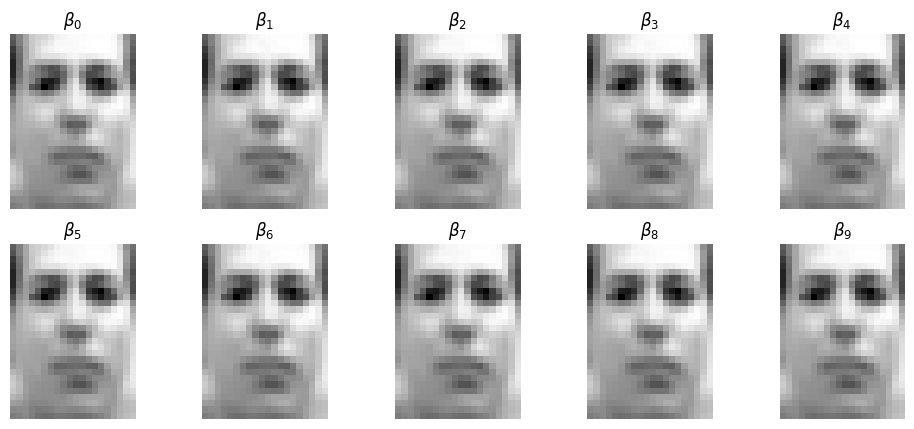

In [ ]:
rank = 10
nmf_model = NMF_Model_PoissonDirExp(data, rank)
nmf_dim = nmf_model.dim
k = jrandom.key(15)
trial_vec = jrandom.normal(k, shape=(nmf_dim,))
theta, beta = nmf_model.t_inv_map(trial_vec)
nmf_advi = mean_field_advi(nmf_model)
nmf_advi.run_advi(k, 10, 5001, 1e-5, print_every=100, adaptive=True)


thetas,betas  = nmf_model.t_inv_map(nmf_advi.params["mu"])

u = 42
fig, axs = plt.subplots(2, 5, figsize=(12, 5))
axs = axs.flatten()
for i in range(10):
    axs[i].imshow(betas[i].reshape(28, 20), cmap="gray")
    axs[i].axis("off")
    axs[i].set_title(rf"$\beta_{{{i}}}$")

theta_25: [3.284535  2.9023647 3.25324   3.151415  3.4009838 3.2777112 3.1394155
 3.2927613 3.4886453 3.6560411]


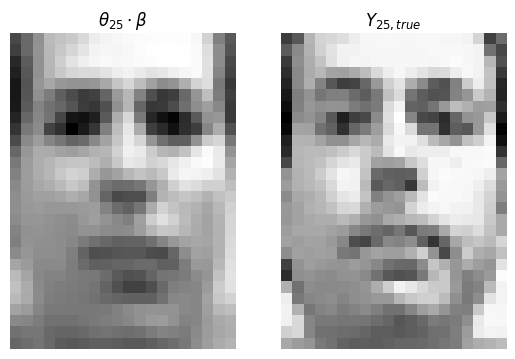

In [36]:
u = 25
plt.figure()
plt.subplot(121)
plt.imshow((thetas[u] @ betas).reshape(28, 20), cmap="gray")
plt.axis("off")
plt.title(rf"$\theta_{{{u}}}\cdot\beta$")
plt.subplot(122)
plt.imshow((data[u]).reshape(28, 20), cmap="gray")
plt.title(rf"$Y_{{{u}, true}}$")
plt.axis("off")
print(f"theta_{u}: {thetas[u]}")